# 기본 예제

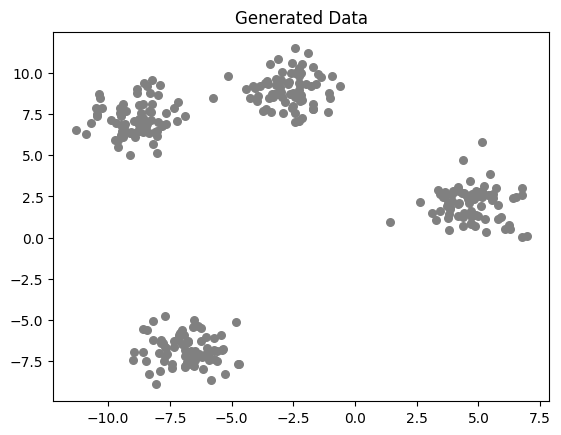

C:\Users\gh159\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gh159\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program File

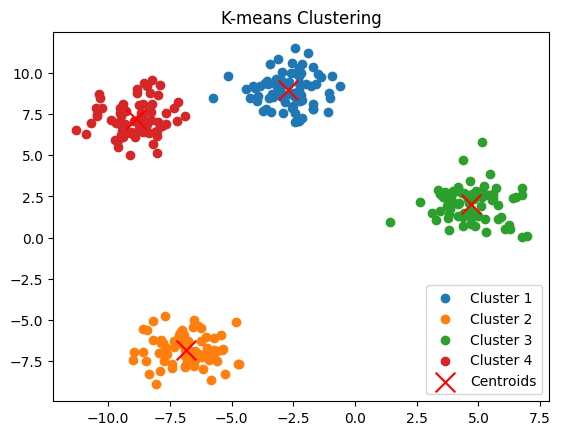

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 샘플 데이터 생성
np.random.seed(42)
data, labels = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 데이터 시각화
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray')
plt.title("Generated Data")
plt.show()

# K-means 알고리즘 적용
kmeans = KMeans(n_clusters=4, random_state=42)  # 클러스터 개수 4개로 설정
kmeans.fit(data)

# 클러스터 할당 및 중심 추출
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 결과 시각화
for i in range(4):
    cluster_points = data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
    
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.legend()
plt.title("K-means Clustering")
plt.show()

# 붓꽃 데이터 군집화

   Actual Label  KMeans Label
0             0             1
1             0             1
2             0             1
3             0             1
4             0             1
5             0             1
6             0             1
7             0             1
8             0             1
9             0             1


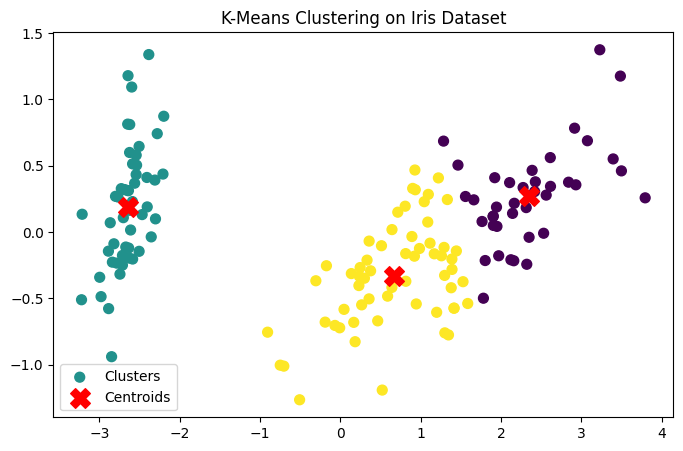

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
target = iris.target

# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

# 결과 비교 (실제 라벨 vs K-Means 라벨)
df = pd.DataFrame({'Actual Label': target, 'KMeans Label': labels})
print(df.head(10))

# PCA를 사용하여 2차원으로 축소 중요!
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=50, label='Clusters')
centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()